In [341]:
#importing my libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [342]:
#loading the dataset
Sales_df = pd.read_csv("/content/drive/MyDrive/Dataset - Dataset.csv")

In [343]:
#First 5 rows
Sales_df.head()

,OrderID,Date,CustomerID,Product,Quantity,Price,Total
0,1,2024-04-12,C002,Phone,1,600,642.09
1,2,2024-12-14,C003,Laptop,2,1000,2098.39
2,3,2024-09-27,C017,Monitor,1,200,196.34
3,4,2024-04-16,C005,Phone,3,600,1955.86
4,5,2024-03-12,C017,Laptop,1,1000,1098.19


In [344]:
#Last 5 rows
Sales_df.tail()

,OrderID,Date,CustomerID,Product,Quantity,Price,Total
195,196,2024-04-22,C019,Monitor,1,200,181.37
196,197,2024-11-13,C017,Laptop,1,1000,1066.13
197,198,2024-02-21,C019,Tablet,1,400,387.62
198,199,2024-09-24,C005,Phone,2,600,1265.72
199,200,2024-10-21,C009,Laptop,1,1000,972.55


In [345]:
#Number of rows and columns in the data
Sales_df.shape

(200, 7)

In [346]:
#Information about the dataset
Sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OrderID     200 non-null    int64  
 1   Date        200 non-null    object 
 2   CustomerID  200 non-null    object 
 3   Product     190 non-null    object 
 4   Quantity    200 non-null    int64  
 5   Price       200 non-null    int64  
 6   Total       194 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 11.1+ KB


In [347]:
#checking for duplicates
Sales_df.duplicated().sum()

np.int64(0)

In [348]:
#Checking for missing values
Sales_df.isnull().sum()

,0
OrderID,0
Date,0
CustomerID,0
Product,10
Quantity,0
Price,0
Total,6


In [349]:
#checkking for Total no of missing values
Sales_df.isnull().sum().sum()

np.int64(16)

In [350]:
#checking for no of unique values
Sales_df.nunique()

,0
OrderID,200
Date,152
CustomerID,20
Product,5
Quantity,3
Price,5
Total,193


In [351]:
#checking the distribution
Sales_df["Product"].value_counts()

,count
Product,
Laptop,76
Phone,59
Tablet,31
Monitor,15
Headphones,9


In [352]:
#checking the number of unique products
print("Number of Unique Products: ", Sales_df["Product"].nunique())

Number of Unique Products:  5


In [353]:
#Checking the unique products
print("Unique Products: ", Sales_df["Product"].unique())

Unique Products:  ['Phone' 'Laptop' 'Monitor' nan 'Tablet' 'Headphones']


In [354]:
#checking the number of unique price
print("Number of Unique Prices: ", Sales_df["Price"].nunique())

Number of Unique Prices:  5


In [355]:
#checking the unique prices
print("Unique Prices: ", Sales_df["Price"].unique())

Unique Prices:  [ 600 1000  200  400  100]


In [356]:
#checking the number of unique customers
print("Number of Unique customers: ", Sales_df["CustomerID"].nunique())

Number of Unique customers:  20


In [357]:
#Assigning the missing products to their prices based on data

Sales_data_mapping = {"Product":"Phone","Price":600, "Product":"Laptop","Price":1000, "Product": "Monitor","Price":200, "Product": "Tablet","Price":400 ,"Product":"Headphones","Price":100}





In [358]:
#filling the non available products and assigning a new variable
New_sales_df = Sales_df.fillna(Sales_data_mapping)

In [359]:
#checking for the no of remaining missing values
New_sales_df.isnull().sum()

,0
OrderID,0
Date,0
CustomerID,0
Product,0
Quantity,0
Price,0
Total,6


In [360]:
#confirming there is no non available for products
print("Unique Products: ", New_sales_df["Product"].unique())

Unique Products:  ['Phone' 'Laptop' 'Monitor' 'Headphones' 'Tablet']


In [361]:
#checking the new information
New_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OrderID     200 non-null    int64  
 1   Date        200 non-null    object 
 2   CustomerID  200 non-null    object 
 3   Product     200 non-null    object 
 4   Quantity    200 non-null    int64  
 5   Price       200 non-null    int64  
 6   Total       194 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 11.1+ KB


In [362]:
#checking the remaining missing values
New_sales_df.isnull().sum()

,0
OrderID,0
Date,0
CustomerID,0
Product,0
Quantity,0
Price,0
Total,6


In [363]:
#dropping the remaining 6 not available for total values
New_sales_df2 = New_sales_df.dropna(how= "any")

In [364]:
#checking to verify there is no blancs
New_sales_df2.isnull().sum()

,0
OrderID,0
Date,0
CustomerID,0
Product,0
Quantity,0
Price,0
Total,0


In [365]:
New_sales_df2["Date"] = pd.to_datetime(New_sales_df["Date"])

<ipython-input-365-07b68a0a2bd6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_sales_df2["Date"] = pd.to_datetime(New_sales_df["Date"])


In [366]:
New_sales_df2.head()

,OrderID,Date,CustomerID,Product,Quantity,Price,Total
0,1,2024-04-12,C002,Phone,1,600,642.09
1,2,2024-12-14,C003,Laptop,2,1000,2098.39
2,3,2024-09-27,C017,Monitor,1,200,196.34
3,4,2024-04-16,C005,Phone,3,600,1955.86
4,5,2024-03-12,C017,Laptop,1,1000,1098.19


In [367]:
New_sales_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OrderID     194 non-null    int64         
 1   Date        194 non-null    datetime64[ns]
 2   CustomerID  194 non-null    object        
 3   Product     194 non-null    object        
 4   Quantity    194 non-null    int64         
 5   Price       194 non-null    int64         
 6   Total       194 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 12.1+ KB


In [368]:
#checking the new distribution
print("Product distribution: \n", New_sales_df2["Product"].value_counts())
print("\n""CustomerID distribution: \n",New_sales_df2["CustomerID"].value_counts())
print("\n""Price distribution: \n",New_sales_df2["Price"].value_counts())
print("\n""Quantity distribution: \n",New_sales_df2["Quantity"].value_counts())
print("\n""Total distribution: \n",New_sales_df2["Total"].value_counts())



Product distribution: 
 Product
Laptop        73
Phone         58
Tablet        31
Headphones    17
Monitor       15
Name: count, dtype: int64

CustomerID distribution: 
 CustomerID
C003    17
C001    17
C016    16
C017    14
C020    14
C002    11
C005    10
C019    10
C008    10
C006     9
C009     8
C004     8
C014     8
C012     7
C018     7
C007     7
C011     6
C010     5
C013     5
C015     5
Name: count, dtype: int64

Price distribution: 
 Price
1000    77
600     62
400     31
200     15
100      9
Name: count, dtype: int64

Quantity distribution: 
 Quantity
1    136
2     43
3     15
Name: count, dtype: int64

Total distribution: 
 Total
962.29     2
2098.39    1
196.34     1
1955.86    1
1098.19    1
          ..
181.37     1
1066.13    1
387.62     1
1265.72    1
972.55     1
Name: count, Length: 193, dtype: int64


In [369]:
#Minimum and Maximum value orders
print("minimum value Order: \n ", New_sales_df2[["Quantity","Price","Total"]].min())
print("\n""maximum value Order: \n ", New_sales_df2[["Quantity","Price","Total"]].max())


minimum value Order: 
  Quantity      1.00
Price       100.00
Total        93.31
dtype: float64

maximum value Order: 
  Quantity       3.00
Price       1000.00
Total       3293.24
dtype: float64


In [370]:
#statistical measures
New_sales_df2.describe()

,OrderID,Date,Quantity,Price,Total
count,194.000000,194,194.000000,194.000000,194.000000
mean,99.546392,2024-07-07 12:37:06.804123648,1.376289,672.680412,937.638711
min,1.000000,2024-01-02 00:00:00,1.000000,100.000000,93.310000
25%,50.250000,2024-04-09 06:00:00,1.000000,400.000000,562.907500
50%,98.500000,2024-07-13 00:00:00,1.000000,600.000000,823.940000
75%,148.750000,2024-09-27 00:00:00,2.000000,1000.000000,1065.937500
max,200.000000,2024-12-29 00:00:00,3.000000,1000.000000,3293.240000
std,57.709747,NaN,0.625581,298.399931,654.166632


In [371]:
#sum of Sales by CustomerID
grouped_New_sales_df2= New_sales_df2.groupby("CustomerID")[["Product","Quantity","Total"]].sum()
grouped_New_sales_df2

,Product,Quantity,Total
CustomerID,,,
C001,PhonePhonePhoneTabletLaptopHeadphonesHeadphone...,22,13851.85
C002,PhoneMonitorPhoneLaptopLaptopLaptopLaptopPhone...,16,10209.33
C003,LaptopTabletHeadphonesTabletPhoneLaptopTabletL...,23,14930.68
C004,LaptopLaptopTabletLaptopLaptopTabletPhoneLaptop,14,11459.72
C005,PhonePhoneLaptopLaptopPhoneHeadphonesPhoneLapt...,16,11717.83
C006,LaptopLaptopLaptopLaptopLaptopTabletLaptopLapt...,13,10634.56
C007,PhoneTabletPhonePhonePhoneHeadphonesLaptop,8,4319.41
C008,PhonePhonePhoneLaptopPhoneHeadphonesLaptopTabl...,14,6971.59
C009,HeadphonesMonitorHeadphonesLaptopLaptopLaptopP...,13,9988.65


In [372]:
grouped_New_sales_df2.sort_values("Total", ascending= False)

,Product,Quantity,Total
CustomerID,,,
C003,LaptopTabletHeadphonesTabletPhoneLaptopTabletL...,23,14930.68
C001,PhonePhonePhoneTabletLaptopHeadphonesHeadphone...,22,13851.85
C016,TabletHeadphonesMonitorLaptopLaptopLaptopLapto...,17,12267.02
C017,MonitorLaptopLaptopHeadphonesLaptopLaptopPhone...,16,12091.74
C005,PhonePhoneLaptopLaptopPhoneHeadphonesPhoneLapt...,16,11717.83
C004,LaptopLaptopTabletLaptopLaptopTabletPhoneLaptop,14,11459.72
C006,LaptopLaptopLaptopLaptopLaptopTabletLaptopLapt...,13,10634.56
C002,PhoneMonitorPhoneLaptopLaptopLaptopLaptopPhone...,16,10209.33
C020,HeadphonesLaptopPhoneMonitorLaptopPhonePhonePh...,17,10040.33


In [373]:
grouped_New_sales_df2.sort_values("Quantity", ascending= False)

,Product,Quantity,Total
CustomerID,,,
C003,LaptopTabletHeadphonesTabletPhoneLaptopTabletL...,23,14930.68
C001,PhonePhonePhoneTabletLaptopHeadphonesHeadphone...,22,13851.85
C016,TabletHeadphonesMonitorLaptopLaptopLaptopLapto...,17,12267.02
C020,HeadphonesLaptopPhoneMonitorLaptopPhonePhonePh...,17,10040.33
C019,TabletMonitorPhonePhoneLaptopTabletLaptopLapto...,16,9920.54
C002,PhoneMonitorPhoneLaptopLaptopLaptopLaptopPhone...,16,10209.33
C005,PhonePhoneLaptopLaptopPhoneHeadphonesPhoneLapt...,16,11717.83
C017,MonitorLaptopLaptopHeadphonesLaptopLaptopPhone...,16,12091.74
C004,LaptopLaptopTabletLaptopLaptopTabletPhoneLaptop,14,11459.72


In [374]:
#mean of Sales Total by Product
Sales_by_product_mean= New_sales_df2.groupby("Product")["Total"].mean()
Sales_by_product_mean

,Total
Product,
Headphones,669.998824
Laptop,1416.520274
Monitor,294.357333
Phone,785.713103
Tablet,552.233226


In [375]:
New_sales_df2.pivot_table(values = "Total", index=["CustomerID"], margins= True, aggfunc= "sum")

,Total
CustomerID,
C001,13851.85
C002,10209.33
C003,14930.68
C004,11459.72
C005,11717.83
C006,10634.56
C007,4319.41
C008,6971.59
C009,9988.65


In [376]:
New_sales_df2.pivot_table(values = "Total", index=["Product"], margins= True, aggfunc= "sum")

,Total
Product,
Headphones,11389.98
Laptop,103405.98
Monitor,4415.36
Phone,45571.36
Tablet,17119.23
All,181901.91


In [377]:
New_sales_df2.pivot_table(values = "Total", index=["CustomerID"], columns=["Product"], margins= True, aggfunc= "sum")

Product,Headphones,Laptop,Monitor,Phone,Tablet,All
CustomerID,,,,,,
C001,817.53,8112.47,433.59,2458.43,2029.83,13851.85
C002,203.80,6148.97,434.12,3015.44,407.00,10209.33
C003,1208.93,6936.54,NaN,3550.88,3234.33,14930.68
C004,NaN,8971.67,NaN,1295.38,1192.67,11459.72
C005,101.74,6056.03,NaN,5560.06,NaN,11717.83
C006,NaN,8737.18,NaN,628.31,1269.07,10634.56
C007,95.45,917.39,NaN,2494.87,811.70,4319.41
C008,214.54,1980.12,640.77,3719.04,417.12,6971.59
C009,3327.35,4633.75,215.15,1812.40,NaN,9988.65


In [378]:
New_sales_df2.pivot_table(values = "Total", index=["Date"], aggfunc= "sum")

,Total
Date,
2024-01-02,1804.88
2024-01-05,396.72
2024-01-09,640.50
2024-01-14,417.13
2024-01-15,685.40
...,...
2024-12-14,2098.39
2024-12-16,613.79
2024-12-24,2566.77


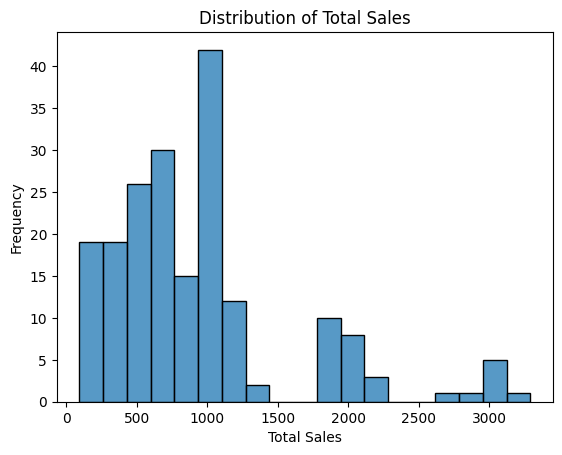

In [379]:
#plotting a Histogram to see the distribution of total bill
sns.histplot(data=New_sales_df2, x="Total")

plt.title("Distribution of Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Frequency")

plt.show()

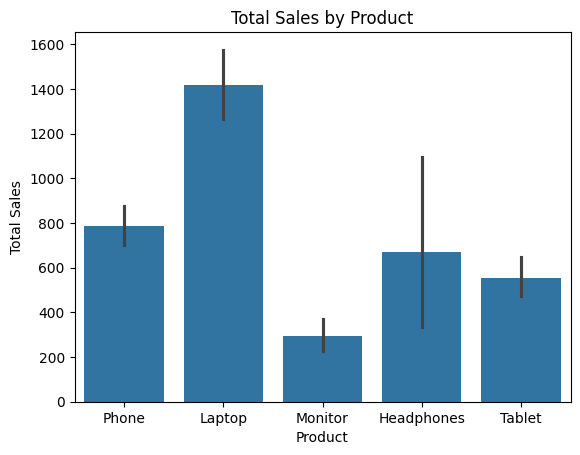

In [380]:
#plotting a bar chart to check top and least products
sns.barplot(x= "Product", y= "Total", data= New_sales_df2)

plt.title("Total Sales by Product")
plt.xlabel("Product")
plt.ylabel("Total Sales")

plt.show()

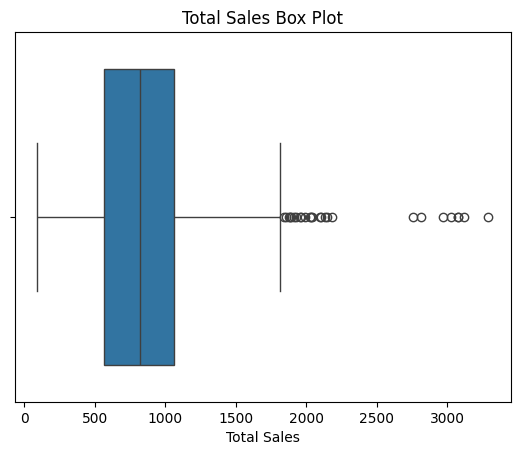

In [381]:
#using box plotting
sns.boxplot(data= New_sales_df2, x="Total")
plt.title("Total Sales Box Plot")
plt.xlabel("Total Sales")

plt.show()

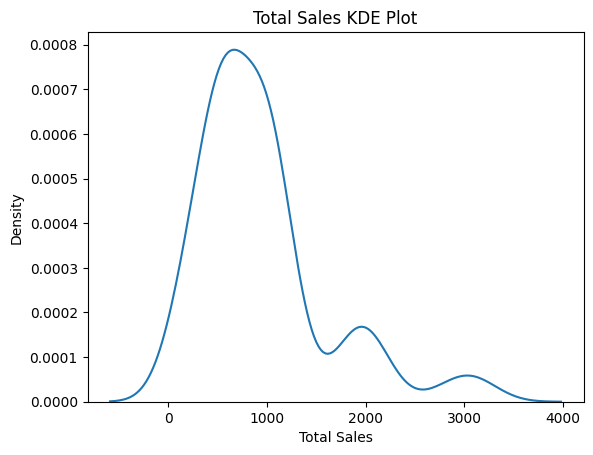

In [382]:
#plottting kdeplot
sns.kdeplot(data= New_sales_df2, x="Total")

plt.title("Total Sales KDE Plot")
plt.xlabel("Total Sales")

plt.show()

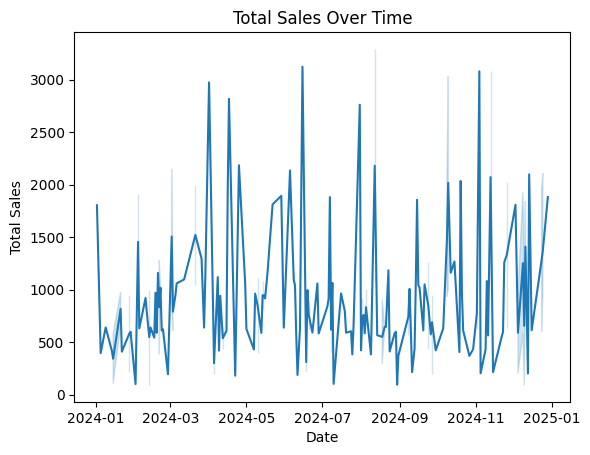

In [383]:
#Line plot to show total sales over time
sns.lineplot(data= New_sales_df2, x="Date", y="Total")

plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")

plt.show()

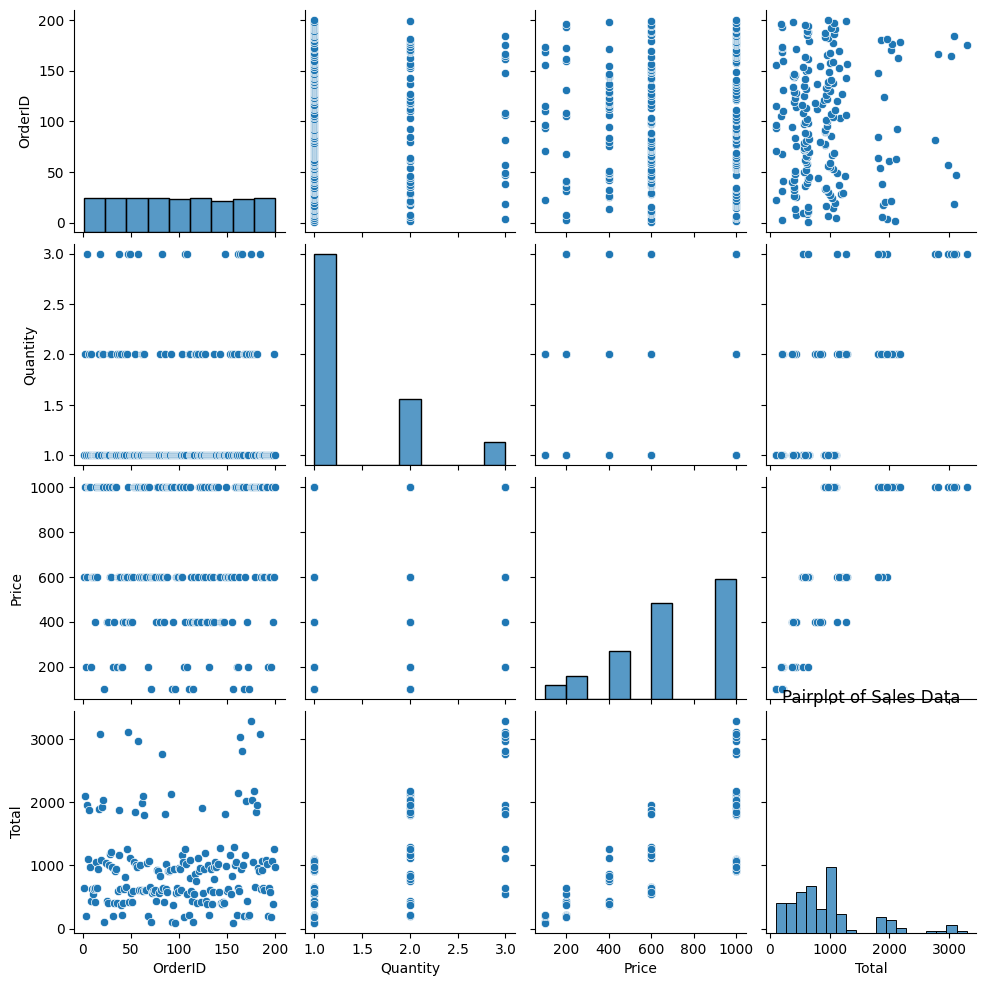

In [384]:
#pairplot with emphasis on product
sns.pairplot(data= New_sales_df2)

plt.title("Pairplot of Sales Data")

plt.show()

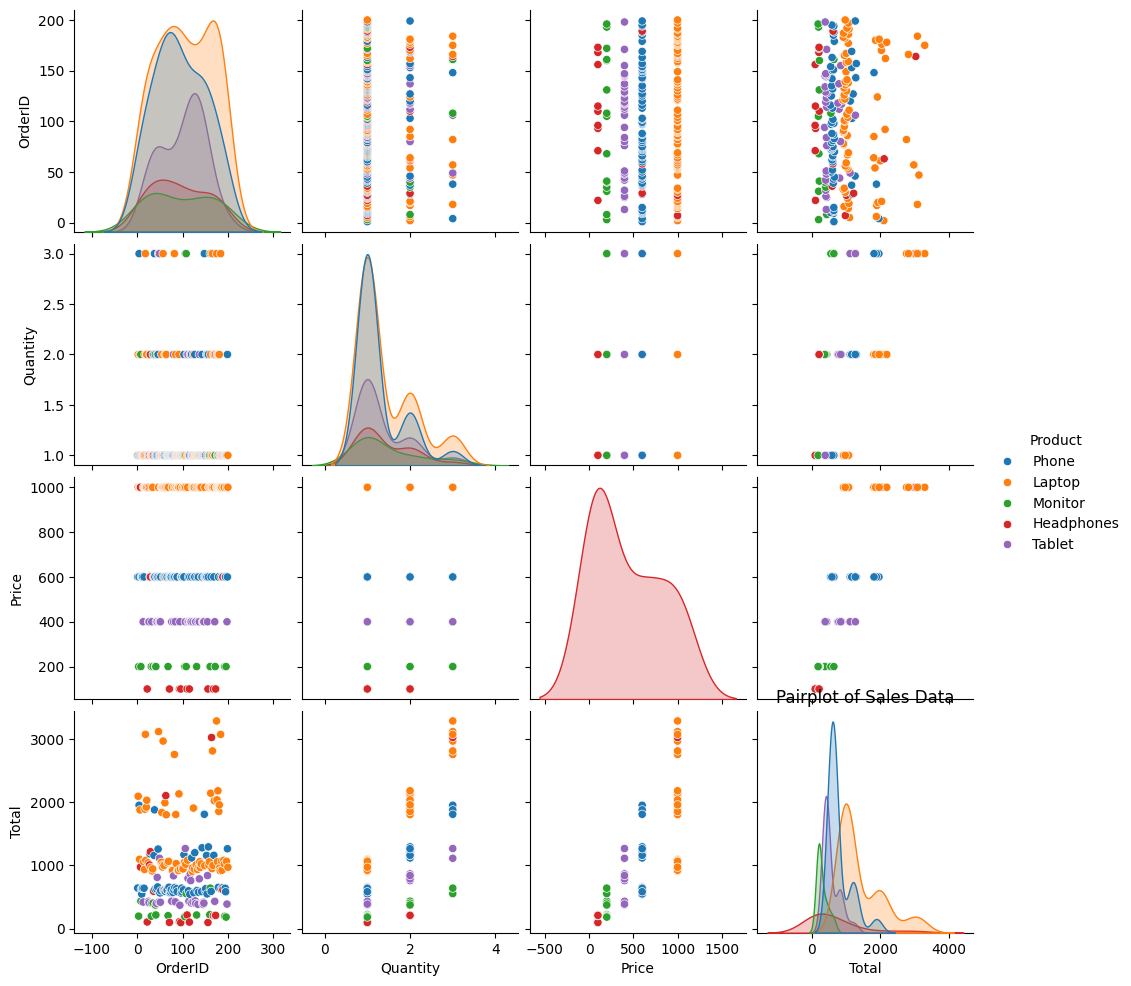

In [385]:
#pairplot with emphasis on product
sns.pairplot(data= New_sales_df2, hue="Product")

plt.title("Pairplot of Sales Data")

plt.show()

# Summary
A1. I started by cleaning my data
a)Duplicates were checked and there was no dupicate value found for my data

b)missing values were checked and both Product and Total had missing values

i)10 Product was filled using data mapping based on available data prices

ii) The Total 6 that was missing were dropped

2. Date was converted to Date time

B Explore

I explored the data by summarising the statistics

There were 5 unique products

There were 5 unique prices

There were 20unique customers

customer coo3 had the highest order of 17 orders while co15 had the lowest order of 5 orders


The Top Product sold was Laptops, which was 73 while least product sold was Monitors which was 15

Quantities for all products was purchased by c003 which was 23 while the least quantity for all products purchased was by customer c015 , 7

The minimum Quantity ordered was 1 while the maximum was 3

The minimum price was 100 dollars which was Headphones while the maximum Price was Laptop which was 1000dollars

The Total order value minimum was 93.31 dollars while the Total Order maximum value was 3293.24 dollars

Customer coo3 had the Total sales for all products which was 14930.68 dollars while co10 had the lowest total sales purchased for all products which was 3617.19 dollars


C. Visualization

My data was visualized using seaborn for Histogram,Bar Chart , Line plot , pairplot ,Kde plot, box plot



